<a href="https://colab.research.google.com/github/Elibaque/SIM_YAC_ELIANA_UPSE2023/blob/main/Esquema_implicito_clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
import math

In [2]:
#Datos del Yacimiento
L=10000
dx=500
Tiempo=100
DT=10
K=50 #Permeabilidad MD
por=0.2
vis=1 # centipoise
Beta=1
CompTotal=1*10**(-6) #ps1-1
A=200000#ft^2


In [3]:
#Calculo de Alpha y Eta con las formulas correspondientes
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

10000.0

Esquema implicito


In [4]:
# Matriz Triagonal depende de cada ecuacion
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2))#creacion de matriz en cero de la Presion implicita
Qimplicita=np.zeros((Tiempo//DT,(L//dx)))#creacion de matriz en cero del caudal implicita

In [5]:
#Condiciones iniciales
Pyac=4000
Piz=2000
Pder=0
Pin=np.ones((L//dx)+2)# crear vector de unos para poder llenar los datos con la presion del yacimiento
Pres=np.zeros((L//dx)+2)# crear vector en ceros donde se colocaran los resultados de la presion
Qres=np.zeros((L//dx))# crear vector en ceros donde se colocaran los resultados del caudal
Pin=Pin*Pyac
Pin[0]=2*Piz-Pin[1]#condiciones iniciales de correccion de frontera
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]#condiciones iniciales de correccion de frontera lado derecho

In [6]:
Pin

array([    0.,  4000.,  4000.,  4000.,  4000.,  4000.,  4000.,  4000.,
        4000.,  4000.,  4000.,  4000.,  4000.,  4000.,  4000.,  4000.,
        4000.,  4000.,  4000.,  4000.,  4000., -4000.])

In [7]:
Pin[0]=Piz  #condicion cuando la presion es cero va ser igual a la presion de la izquierda
Pin[len(Pin)-1]=Pder #condicion cuando la presion se encuentra en el ultimo nodo va ser igual a la presion de la derecha
N=(L//dx)+2 # numero de nodos totales donde se incluyen los nodos de la frontera
Baccumul=A*dx*por*CompTotal/Beta# volumen acumulado formula
Transmisibilidad=(K*A/(vis*Beta*dx))*6.33*10**-3# formulta de la transmisibilidadad con factor de correccion por las diferentes unidades
B=np.zeros([N-2,N-2])#vector en cero de el volumen acumulado donde se ingresan los valores de acuerdo a las condiciones
T=np.zeros([N-2,N-2])#vector en cero de el volumen acumulado donde se ingresan los valores de transmisiblidad de acuerdo a las condiciones
Transmisibilidad

126.60000000000001

In [8]:
#Caracteristicas de la matriz de Volumen acumulado
for i in range(0,N-2):
  B[i,i]= Baccumul#Solo cuando i=i va a tener el mismo valor que el volumenacumulado
 #Caracteristicas de la matriz de la transmisibilidad
for i in range(0,N-2):
  T[i,i]=2*Transmisibilidad#Solo cuando i=i va a tener el valor del doble de transmisibilidad
  if i>0: #siempre y cuando i se encuentre en la posicion mayor a 0
    T[i,i-1]=-Transmisibilidad#Los valores de la derecha cuando i=i van a ser la transmisibilidad negativa
  if i<(N-3): #siempre y cuando i se encuentre en la posicion mayor a N-3
    T[i,i+1]=-Transmisibilidad  #Los valores de la izquierda cuando i=i van a ser la transmisibilidad negativa
T[0,0]=3*Transmisibilidad # Cuando se encuentren en la posicion 0,0 va a vales tres veces la transmisibilidad
T[N-3,N-3]=Transmisibilidad# Cuando se encuentren en la posicion N-3,N-3 va a ser igual a la transmisibilidad
T

array([[ 379.8, -126.6,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ],
       [-126.6,  253.2, -126.6,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ],
       [   0. , -126.6,  253.2, -126.6,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. , -126.6,  253.2, -126.6,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , -126.6,  253.2, -126.6,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. , -126.6,  253.2, -126.6,    0. ,
   

In [9]:
#Respecto a la presion
Matriz_resolucion=np.zeros_like(T) # se crea matriz del tamaño del T
Vector_sol=np.zeros_like(Pin[1:-1])# Se indica donde empieza y hasta donde termina la matriz en ceros
Matriz_resolucion=T+(B/DT) #Aplicacion de una parte de la ecuacion del esquema implicito
Vector_sol=np.matmul(B/DT,Pin[1:-1])#Calcula las matrices, multiplica la matriz  B/DT con Pin[1:-1]
#Pres=[]
#Respecto al caudal
Q=np.zeros_like(Vector_sol)# se crea matriz del tamaño del Vector_sol
Q[0]=2*Transmisibilidad*Piz# se coloca la condicion cuando Q se encuentre en el nodo cero
Vector_sol=Vector_sol+Q
Q


array([506400.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.])

In [10]:
Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)#como es un sistema de ecuaciones lineales se resuelve por linalg

In [11]:
Qimplicita[0]=Q
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Vector_sol=np.matmul(B/DT,Pcal)+Q
  Qimplicita[t//DT]=Vector_sol
  t=t+DT

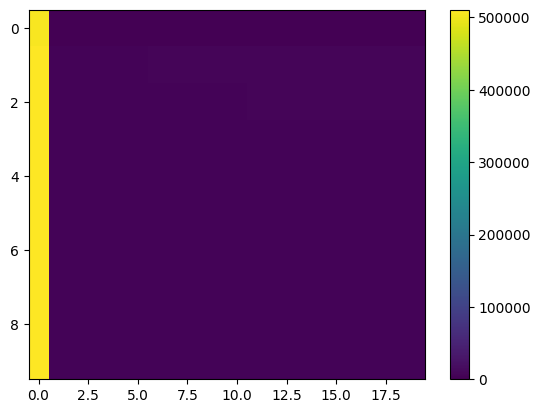

In [12]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Qimplicita,aspect='auto')
plt.colorbar()


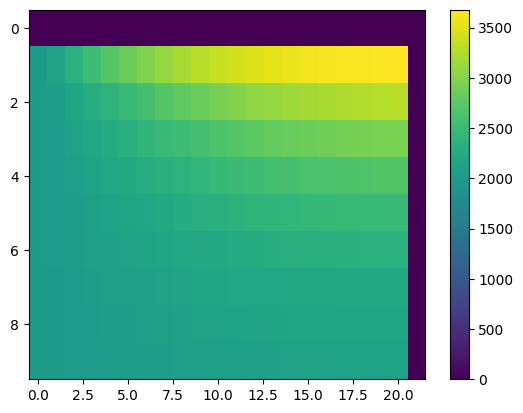

In [13]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()